<Body>   
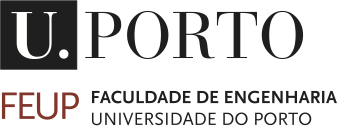   
<h1> <b>Control and Optimization 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt), **M. Rosário Pinho** (mrpinho@fe.up.pt)



FEUP, Fev. 2024

---


# **Notebook #02: State-Space Model**


#1- The Pendulum System





Consider the following nonlinear pendulum model
$$
\ m \ell^2 \ddot{\theta} + b\dot{\theta}+ m g \ell \sin\theta  = 0,
$$
where
- $\theta$ is the pendulum angle measured from the vertical;
- $m$ is the pendulum mass;
- $\ell$ is the pendulum rod length;
- $g$ is the gravity acceleration;
- $b$ is the coefficient of rotational friction.

## **Activity 1**



###**1.1. State-Space Dynamics**
Using as state variables $x_1=\theta$ and $x_2=\dot\theta$,  obtain the state-space dynamics.

**Sol 1.1**

\begin{align*}
\dot{x}_1 &= x_2 \\
\dot{x}_2 &= - \frac{b}{ml^2} x_2-\frac{g}{l} \sin(x_1)
\end{align*}

###**1.2. Time-evolution and Phase space**
Plot the **time-evolution** of the state and the **phase space** for different initial conditions.
Use the numerical integrator `integrate.odeint` of `scipy` or the `NonlinearIOSystem` of `control`

Integration successful.


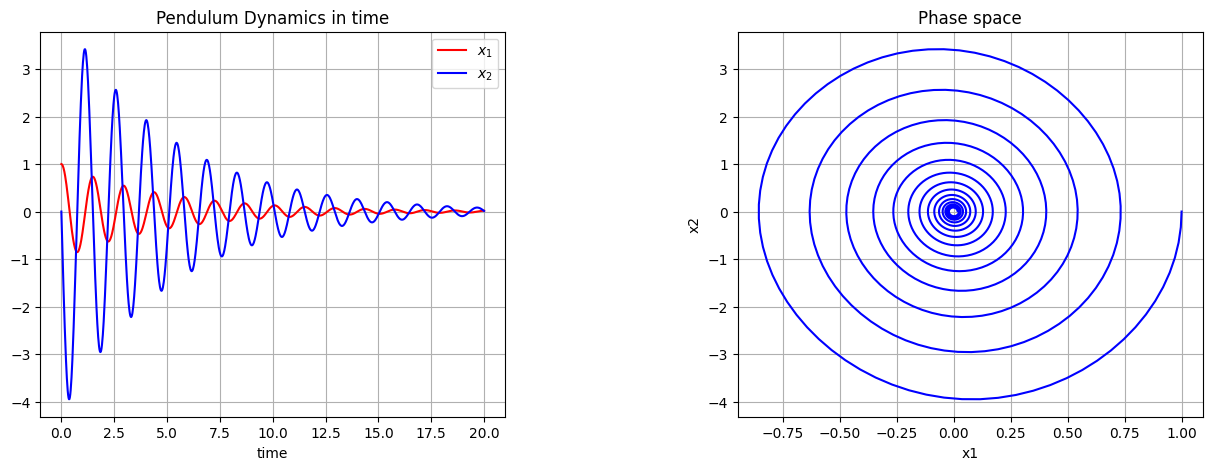

In [26]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
# show plots in notebook
# matplotlib inline

# parameters
m = 1.0
l = 0.5
g = 9.81
b = 0.1

# vector field
def Sys_f(x, t=0):
  return np.array([x[1], -(b / (m * l ** 2)) * x[1] - (g / l) * np.sin(x[0])])

# generate 1000 linearly spaced points for t
t_end=20
t = np.linspace(0, t_end,  1000)

# initial values:
x0 = np.array([1.0, 0])
#x0 = np.array([3.13, 0])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
x, infodict = integrate.odeint(Sys_f, x0, t, full_output=True)
print(infodict['message']) # integration successful

x1,x2 = x.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t, x1, 'r-', label='$x_1$')
ax1.plot(t, x2, 'b-', label='$x_2$')
ax1.set_title("Pendulum Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x1, x2, color="blue")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("Phase space")
ax2.grid()


### **1.3.Euler and Runge-Kutta numerical methods**
Do the same using an Euler discretization and Runge-Kutta 4th order. Compare the results for different sample-times.

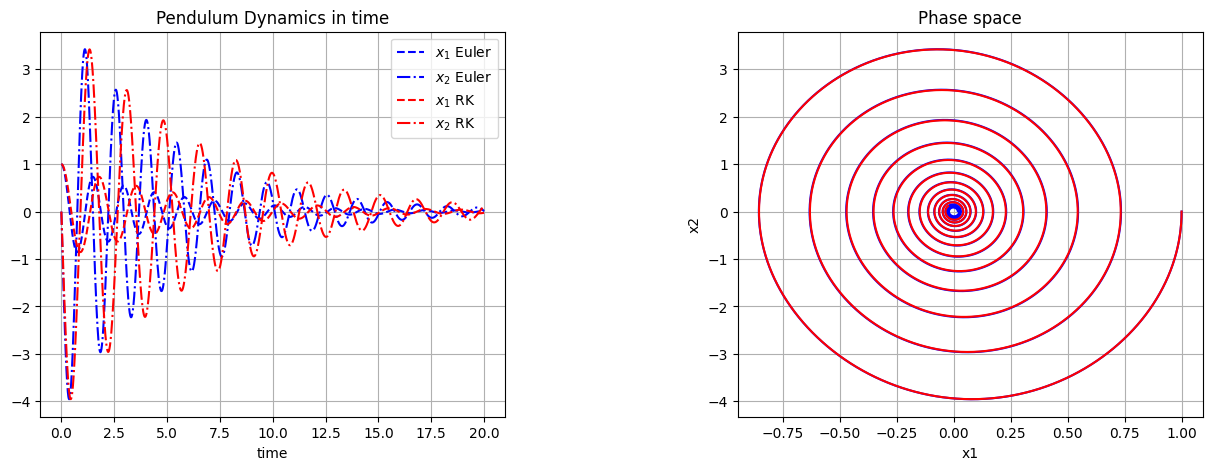

In [27]:
def Sys_f(x, t=0):
  return np.array([x[1], -(b / (m * l ** 2)) * x[1] - (g / l) * np.sin(x[0])])

def euler_step_f(x, h):
  #return np.array([x[0] + h * Sys_f(x)[0], x[1] + h * Sys_f(x)[1]])
  return np.array(x + h * Sys_f(x))

def rk_step_f(x, h, t):
  # k1, k2, k3, k4: intermediate values used in the Runge-Kutta method
  k1 = h * Sys_f( x, t)
  k2 = h * Sys_f( x + k1/2, t + h/2)
  k3 = h * Sys_f( x + k2/2, t + h/2)
  k4 = h * Sys_f( x + k3, t + h)
  # x_new: updated value of the solution using the Runge-Kutta method
  x_new = x + (1/6)*(k1 + 2*k2 + k3 + k4)
  return x_new


#Sample-time
dt = 0.0001

# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples

x1_signal = np.zeros_like(t_signal)
x2_signal = np.zeros_like(t_signal)

#Initial conditions of our system
x1_signal[0] = 1.0
x2_signal[0] = 0.0

x1_signalRK = x1_signal.copy()   # Copy Not Reference! Check what happens if .copy is ommitted
x2_signalRK = x2_signal.copy()


for i in range(0,t_signal.shape[0]-1):
    x1_signal[i+1], x2_signal[i+1] = euler_step_f((x1_signal[i],x2_signal[i]),dt)
    x1_signalRK[i+1], x2_signalRK[i+1] = rk_step_f((x1_signalRK[i],x2_signalRK[i]),dt,t_signal[i])


#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t_signal, x1_signal, 'b--', label='$x_1$ Euler')
ax1.plot(t_signal, x2_signal, 'b-.', label='$x_2$ Euler')
ax1.plot(t_signal, x1_signalRK, 'r--', label='$x_1$ RK')
ax1.plot(t_signal, x2_signalRK, 'r-.', label='$x_2$ RK')
ax1.set_title("Pendulum Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x1_signal, x2_signal, color="blue",label=' Euler')
ax2.plot(x1_signalRK, x2_signalRK, color="red",label=' RK')
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("Phase space")
ax2.grid()





###**1.4. No friction solution**
Try now with no friction, that is, $b=0$.

In [28]:
b=0
#b=0.1

# run 1.3

###**1.5. Equilibrium points**
Compute the equilibrium points. Use the `Sympy` module for symbolic mathematics.

In [29]:
# Solution 1.5

import sympy as sm

x1, x2 = sm.symbols('x1, x2')
f1 = x2
f2 = -m*g*l*sm.sin(x1) - b*x2

# setting the vector field to zero
f1Equal = sm.Eq(f1, 0)
f2Equal = sm.Eq(f2, 0)

# compute the equilibrium points
equilibria = sm.solve( (f1Equal, f2Equal), x1, x2 )
print(equilibria)

[(0.0, 0.0), (3.14159265358979, 0.0)]


###**1.6. Quiver plot**
Draw the quiver plot.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


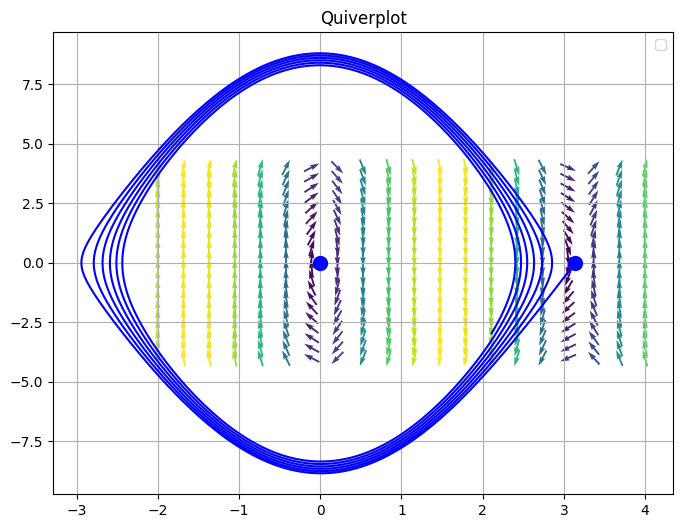

In [30]:
#Sample-time
dt = 0.01

# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples
x1_signal = np.zeros_like(t_signal)
x2_signal = np.zeros_like(t_signal)

#Initial conditions of our system
#x1_signal[0] = 1.0
x1_signal[0] = np.pi - 0.01
x2_signal[0] = 0.0

for i in range(0,t_signal.shape[0]-1):
    x1_signal[i+1], x2_signal[i+1] = rk_step_f((x1_signal[i],x2_signal[i]),dt,t_signal[i])


#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

# plot equilibrium points
for point in equilibria:
  ax4.plot(point[0],point[1],"blue", marker = "o", markersize = 10.0)
ax4.set_title("Quiverplot")
ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
x1 = np.linspace(-2, 4, 20)
x2 = np.linspace(-4, 4, 20)

X1 , X2  = np.meshgrid(x1, x2)                  # create a grid
DX1, DX2 = Sys_f([X1, X2])                      # compute growth rate on the grid
M = (np.hypot(DX1, DX2))                        # norm growth rate
M[ M == 0] = 1.                                 # avoid zero division errors
DX1 /= M                                        # normalize each arrows
DX2 /= M

ax4.quiver(X1, X2, DX1, DX2, M, pivot='mid')
#ax4.plot(myx1, myx2, color="blue")
ax4.plot(x1_signal, x2_signal, color="blue")
#ax4.axis('Equal')
ax4.grid()



# 2- Other 2nd order systems


## **Activity 2**

Repeat the previous points, that is, find all the equilibrium points, sketch the phase portrait, and determine the type of each isolated equilibrium point for the systems:





### **2.1. Nonlinear System 1**

\begin{align*}
\dot x_1 &= 2 x_1 - x_1 x_2 \\
\dot x_2 &= 2 x_1^2 - x_2
\end{align*}


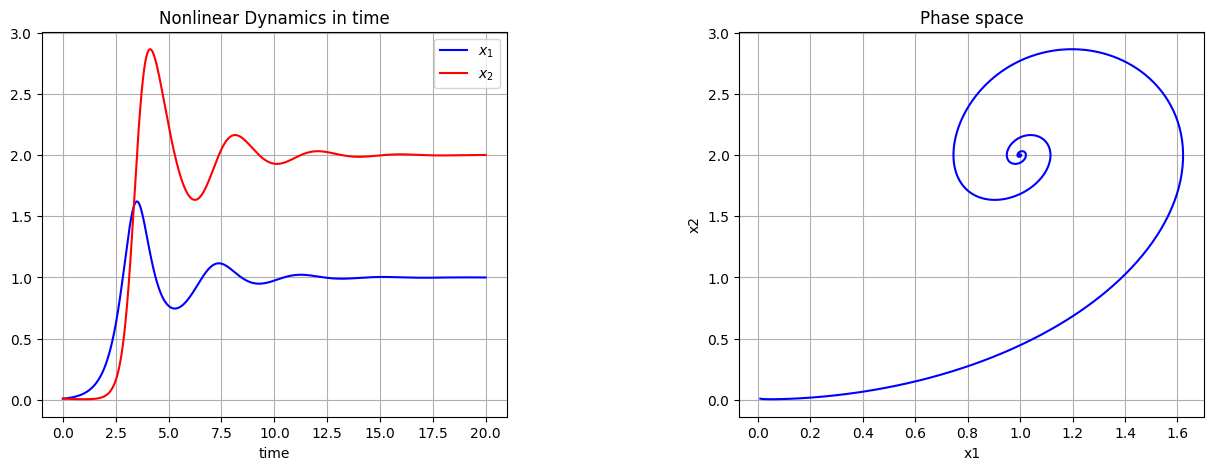

In [31]:
# vector field
def Sys_f(x, t=0):
  return np.array([2*x[0] - x[0]*x[1], 2*x[0]**2 - x[1]])


#Sample-time
dt = 0.01

# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples

x1_signal = np.zeros_like(t_signal)
x2_signal = np.zeros_like(t_signal)

#Initial conditions of our system
# Equilibrium Points (+-1, 2), (0, 0)
x1_signal[0] = 0.01
x2_signal[0] = 0.01


for i in range(0,t_signal.shape[0]-1):
    x1_signal[i+1], x2_signal[i+1] = rk_step_f((x1_signal[i],x2_signal[i]),dt,t_signal[i])


#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t_signal, x1_signal, 'b-', label='$x_1$')
ax1.plot(t_signal, x2_signal, 'r-', label='$x_2$')
ax1.set_title("Nonlinear Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x1_signal, x2_signal, color="blue")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("Phase space")
ax2.grid()




###**2.2. Nonlinear system 2 - Van der Pol oscillator**
The Van der Pol oscillator
$$\ddot x-\mu(1-x^2)\dot x+x=0$$
with $\mu = 0.5$ and $x_0 = (1, 1)$.


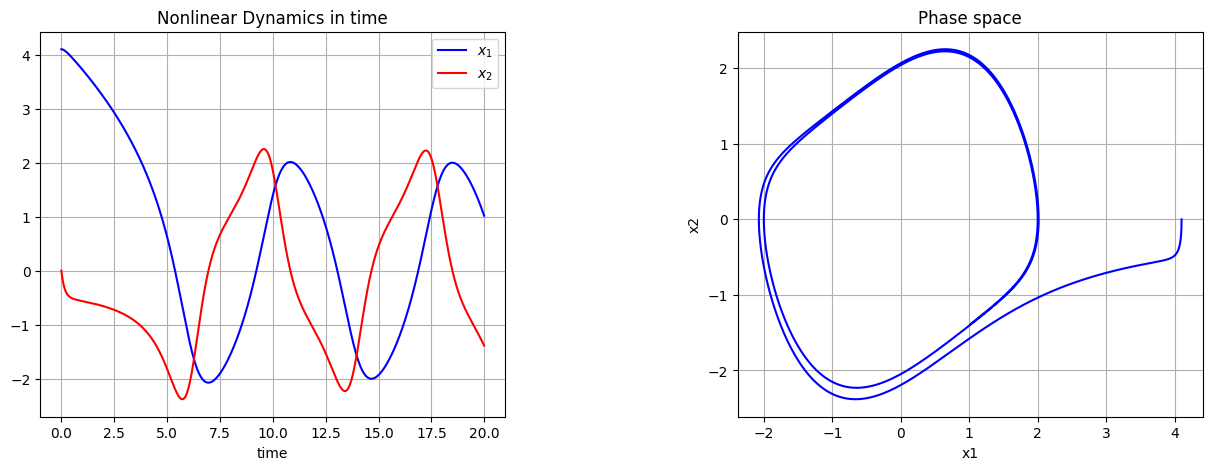

In [32]:
# vector field
mu=0.5

def Sys_f(x, t=0):
  return np.array([x[1], mu*(1 - x[0]**2)*x[1] - x[0]])

#Sample-time
dt = 0.01

# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples

x1_signal = np.zeros_like(t_signal)
x2_signal = np.zeros_like(t_signal)

#Initial conditions of our system
x1_signal[0] = 4.1
x2_signal[0] = 0.0


for i in range(0,t_signal.shape[0]-1):
    x1_signal[i+1], x2_signal[i+1] = rk_step_f((x1_signal[i],x2_signal[i]),dt,t_signal[i])


#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t_signal, x1_signal, 'b-', label='$x_1$')
ax1.plot(t_signal, x2_signal, 'r-', label='$x_2$')
ax1.set_title("Nonlinear Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x1_signal, x2_signal, color="blue")

ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("Phase space")
ax2.grid()



###**2.3. Nonlinear System 3**
\begin{align*}
\dot x_1 &= x_1(2-x_1-x_2) \\
\dot x_2 &= x_2(x_1-1)
\end{align*}

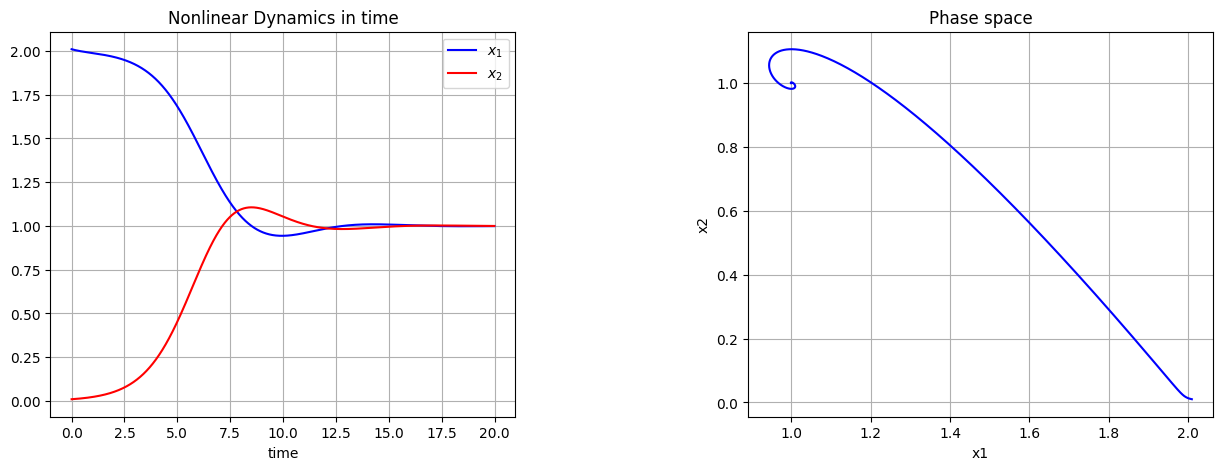

In [33]:
# vector field
def Sys_f(x, t=0):
  return np.array([x[0]*(2 - x[0] - x[1]), x[1]*(x[0] - 1)])


#Sample-time
dt = 0.01

# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples

x1_signal = np.zeros_like(t_signal)
x2_signal = np.zeros_like(t_signal)

#Initial conditions of our system
# Equilibrium Points (1, 1); (2, 0), (0, 0)
x1_signal[0] = 2.01
x2_signal[0] = 0.01


for i in range(0,t_signal.shape[0]-1):
    x1_signal[i+1], x2_signal[i+1] = rk_step_f((x1_signal[i],x2_signal[i]),dt,t_signal[i])


#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t_signal, x1_signal, 'b-', label='$x_1$')
ax1.plot(t_signal, x2_signal, 'r-', label='$x_2$')
ax1.set_title("Nonlinear Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x1_signal, x2_signal, color="blue")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("Phase space")
ax2.grid()